In [70]:
#importamos las librerias a utilizar
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  #para grafica ganancia total por cada año por deporte

In [ ]:
#con ayuda de pandas leemos el Df
df= pd.read_csv("forbes-dataset-2020.csv")
#df.info()
df


In [3]:
#Realizamos limpieza de datos
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [ ]:
df['Sport'] = df['Sport'].str.lower()  #hacemos que todos los valores en columna sport esten en minusculas
df_limpio=df.drop('S.NO',axis=1)
df_limpio


**Atleta con el menor número de apariciones y mayores ganancias**

In [ ]:
apariciones_atleta=df_limpio["Name"].value_counts(ascending=True) #vemos cuantas veces aparece cada atleta en el df
apariciones_atleta.to_frame()  #transformo valores en una df

ap_at=apariciones_atleta.reset_index() #Transformo mi indice en columna
ap_at

ap_min=ap_at[ap_at["Name"]==1]  #me quedo con los atletas que solo aparecen una vez
ap_min

ap_min_gan=pd.concat([ap_min, df_limpio['earnings ($ million)']], axis = 1) #uno mi df a la columna ganancias
ap_min_gan=ap_min_gan.dropna()     #elimino valores NaN

ap_min_gan=ap_min_gan.sort_values('earnings ($ million)', ascending=False) #ordeno mis datos de + a -, en base a la columna de ganancia

#Damos formato al df
ap_min_gan=ap_min_gan.rename(columns={"index":"Nombre", "Name":"Num de apariciones", "earnings ($ million)":"Ganancia($ millones)"})
ap_min_gan["Num de apariciones"]=ap_min_gan["Num de apariciones"].astype(int)
ap_min_gan=ap_min_gan[:10]  #solo muestro los primeros 10 valores
ap_min_gan.style.background_gradient(cmap='RdPu')

#LISTO!

,Nombre,Num de apariciones,Ganancia($ millones)
10,Terrell Suggs,1,60.500000
30,Cecil Fielder,1,36.000000
20,Lewis Hamilton,1,35.900000
11,Drew Brees,1,31.500000
0,Jeff Gordon,1,28.600000
21,Conor McGregor,1,28.000000
1,Sergei Federov,1,26.000000
31,Emmit Smith,1,25.000000
22,Matthew Stafford,1,22.000000
32,Gerhard Berger,1,18.500000


**¿Cuántos atletas por deporte tiene cada país?**

In [98]:
#filtro por atleta,deporte y pais, es decir que solo me aparezca 1 vez el nombre del atleta en cada deporte dentro de cada país
at_country= df_limpio.pivot_table(index=("Nationality","Sport","Name"),values=("earnings ($ million)"), aggfunc="sum")

at_country2 = at_country.reset_index() #utilizo el metodo reset_index para generar un nuevo indice y que mi
at_country2.columns                           #indice anterior se transforme en columna para poder trabajar con ella

Index(['Nationality', 'Sport', 'Name', 'earnings ($ million)'], dtype='object')

In [ ]:
#Obtengo la frecuencia (cuantas veces aparece) de cada deporte en cada pais y lo almaceno en una nueva columna
frecuencia= at_country2.groupby(['Nationality', 'Sport']).size()

at_country["frecuencia"]=frecuencia
at_country

In [100]:
#vuelvoa filtrar mi tabla por nacionalidad y dporte teniendo como valores la frecuencia
numat_country= at_country.pivot_table(index=("Nationality","Sport"),values=("frecuencia"))
numat_country

numat_country = numat_country.reset_index()  #transformo indices en columnas

#Damos formato al df
numat_country=numat_country.rename(columns={"Nationality":"País", "Sport":"Deporte", "frecuencia":"Num. de atletas"})
numat_country["Num. de atletas"]=numat_country["Num. de atletas"].astype(int)
numat_country

#LISTO!

,País,Deporte,Num. de atletas
0,Argentina,soccer,1
1,Australia,golf,1
2,Austria,auto racing,1
3,Brazil,auto racing,1
4,Brazil,soccer,2
5,Canada,auto racing,1
6,Canada,boxing,1
7,Canada,hockey,1
8,Canada,ice hockey,1
9,Dominican,baseball,1


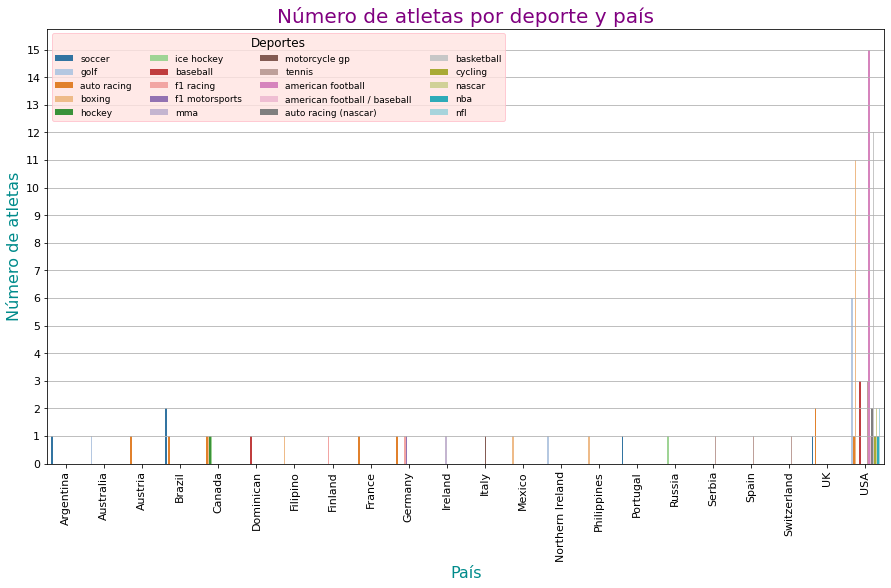

In [ ]:
#GRAFICA con ayuda de sns

sns.barplot(x = "País", y = "Num. de atletas", hue="Deporte" ,data = numat_country, 
            ci=None, dodge=True, palette = "tab20"
            )


##Personalizamos gráfica con ayuda de plt
plt.xlabel("País",{"color":"darkcyan","fontsize":16})
plt.xticks(fontsize=11,rotation=90)

plt.ylabel("Número de atletas",{"color":"darkcyan","fontsize":16})
plt.yticks( np.arange(0, 16, 1))
plt.yticks(fontsize=11)

plt.title("Número de atletas por deporte y país",
          {"color":"Purple","fontsize":20}) 

plt.legend(fontsize=9, ncol=4,
           shadow=False, facecolor="mistyrose", edgecolor="pink",
           title="Deportes", title_fontsize=12,
           loc="upper left")
plt.grid(True, axis="y")
plt.gcf().set_size_inches(15, 8) #con ayuda de matplotlib.pyplot modifico el tamaño de mi grafico

plt.show()

**País con mayor número de deportes con atletas en el dataset**

In [101]:
#Partiendo de mi Df anterior  donde ya se cuantos atletas hay por deporte y por pais
#abstraigo el nombre del pais que aparece mas veces (al aparecer mas veces tiene mas deportes)
frecuencia_country= numat_country.groupby(['País']).size()
frecuencia_country  #podemos ver la cantidad de deportes con almenos 1 atleta que tiene c/pais

country_sport=frecuencia_country.to_frame()

country_sport=country_sport.reset_index()   #transformo mi indice en columna
country_sport

country_max= country_sport[["País",0]].max() #de esta manera puedo ver el pais con mayor
country_max                                            #de deportes con atletas y cuantos deportes son

country_sport=country_sport.rename(columns={0:"Num. de deportes con atletas", "Nationality":"Pais"}) #renombramos columas
country_sport=country_sport.sort_values("Num. de deportes con atletas", ascending=False) #ordeno mis datos de + a -

country_sport=country_sport[:10]
country_sport
country_sport.style.background_gradient(cmap='RdPu')   #asi con colores(purple) observo el pais con mas deportes con atletas

#LISTO! :)

,País,Num. de deportes con atletas
21,USA,13
4,Canada,4
9,Germany,3
20,UK,2
3,Brazil,2
13,Northern Ireland,1
19,Switzerland,1
18,Spain,1
17,Serbia,1
16,Russia,1


In [121]:
fig = px.bar(country_sport, x="País", y="Num. de deportes con atletas", 
             color="Num. de deportes con atletas", text_auto=True,
             title="País y número de deportes con atletas")
fig.show()



**Ganancia mínima y máxima (dentro del dataset) por deporte y por país**

In [127]:
#filtro por deporte y pais 
country_sport= df_limpio.pivot_table(index=("Nationality","Sport"), values=("earnings ($ million)"), 
                                     aggfunc=('max',"min"))
country_sport  # creo un  nuevo df donde los deportes se dvidan por pais y los valores correspondan a la mayor y menor ganancia

country_sport=country_sport.reset_index()  #transformamos indices en columnas
gan_min_max=country_sport.rename(columns={"Nationality":"País", "Sport":"Deporte",
                                          "max":"Ganancia maxima",
                                          "min":"Ganancia mínima"}) #renombramos columas
gan_min_max.head()

# LISTO! :)

,País,Deporte,Ganancia maxima,Ganancia mínima
0,Argentina,soccer,127.0,32.3
1,Australia,golf,8.5,8.5
2,Austria,auto racing,13.5,13.5
3,Brazil,auto racing,22.0,10.0
4,Brazil,soccer,105.0,31.0


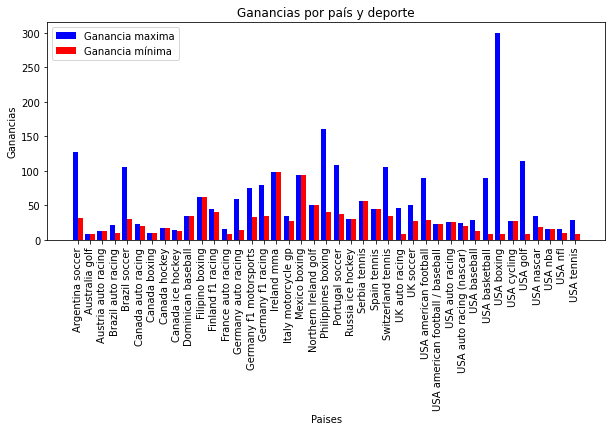

In [129]:
gan_min_max['Deporte_en_pais'] = gan_min_max['País'].str.cat(gan_min_max['Deporte'], sep =" ")
X = gan_min_max['Deporte_en_pais']
Ymax = gan_min_max['Ganancia maxima']
Zmin = gan_min_max['Ganancia mínima']
X_axis = np.arange(len(X))
plt.figure(figsize=(10,4))
plt.bar(X_axis - 0.2, Ymax, 0.4, label = 'Ganancia maxima',color='blue')
plt.bar(X_axis + 0.2, Zmin, 0.4, label = 'Ganancia mínima',color='red')
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Paises")
plt.ylabel("Ganancias")
plt.title("Ganancias por país y deporte")
plt.legend()
plt.show()

**Atleta con mayores ganancias por deporte por década**

In [77]:
#creamos columna decada dentro de mi Df
bins=[1989,1999,2009,2019, 2020]
labels=["1990","2000","2010","2020"]

df_limpio["Década"]=pd.cut(df_limpio["Year"], bins=bins, labels=labels)
df_limpio["Década"].astype(int)
df_limpio.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Década
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6,1990
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0,1990
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,1990
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0,1990
4,Alain Prost,France,5,NaN,auto racing,1990,9.0,1990


In [ ]:
maxgan_dec_sport= df_limpio.pivot_table(index=("Década","Sport"), values=("Name","earnings ($ million)"), 
                                        aggfunc='max')
maxgan_dec_sport  # creo un  nuevo df donde los deportes se dvidan por decada y los valores correspondan al 
                  #      atleta que tiene la mayor ganancia

maxgan_dec_sport= maxgan_dec_sport.reset_index() # transformamos indices en columnas
maxgan_dec_sport=maxgan_dec_sport.rename(columns={"Name":"Nombre", "Sport":"Deporte", 
                                          "earnings ($ million)":"Ganancia ($ millones)"}) #renombramos columas


maxgan_dec_sport
# LISTO! :)

In [110]:
maxgan_dec_sport.columns
maxga_1990= maxgan_dec_sport[maxgan_dec_sport['Década']=="1990"]
maxga_2000= maxgan_dec_sport[maxgan_dec_sport['Década']=="2000"]
maxga_2010= maxgan_dec_sport[maxgan_dec_sport['Década']=="2010"]
maxga_2020= maxgan_dec_sport[maxgan_dec_sport['Década']=="2020"]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

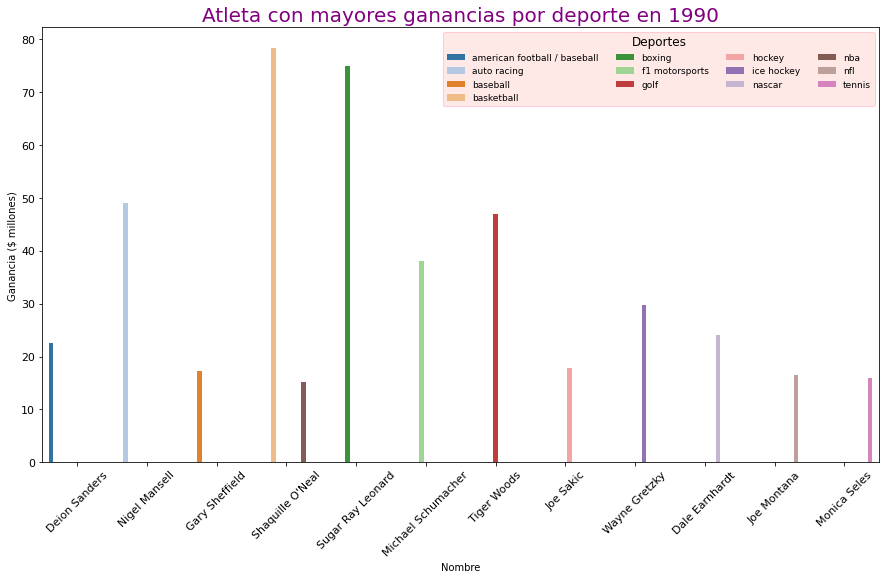

In [126]:
#Gráfica
sns.barplot(x ="Nombre", y = "Ganancia ($ millones)", 
            hue="Deporte",data=maxga_1990, 
            ci=None, dodge=True, palette = "tab20"
            )
#Damos formato
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=11)

plt.title("Atleta con mayores ganancias por deporte en 1990",
          {"color":"Purple","fontsize":20}) 

plt.legend(fontsize=9, ncol=4,
           shadow=False, facecolor="mistyrose", edgecolor="pink",
           title="Deportes", title_fontsize=12,
           loc="upper right")

plt.gcf().set_size_inches(15, 8) #con ayuda de matplotlib.pyplot modifico el tamaño de mi grafico
plt.xticks(fontsize=11,rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

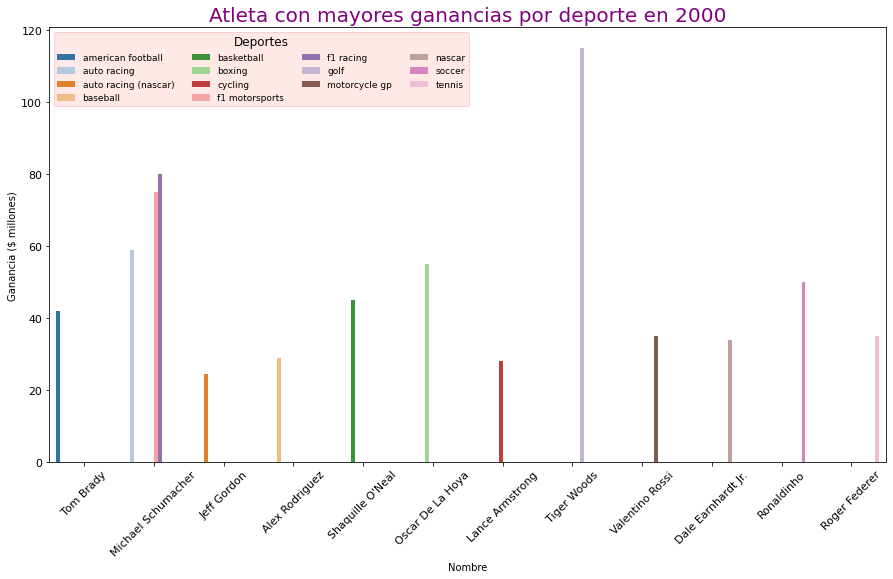

In [125]:
sns.barplot(x ="Nombre", y = "Ganancia ($ millones)", 
            hue="Deporte",data=maxga_2000, 
            ci=None, dodge=True, palette = "tab20"
            )
#Damos formato
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=11)

plt.title("Atleta con mayores ganancias por deporte en 2000",
          {"color":"Purple","fontsize":20}) 

plt.legend(fontsize=9, ncol=4,
           shadow=False, facecolor="mistyrose", edgecolor="pink",
           title="Deportes", title_fontsize=12,
           loc="upper left")

plt.gcf().set_size_inches(15, 8) #con ayuda de matplotlib.pyplot modifico el tamaño de mi grafico
plt.xticks(fontsize=11,rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

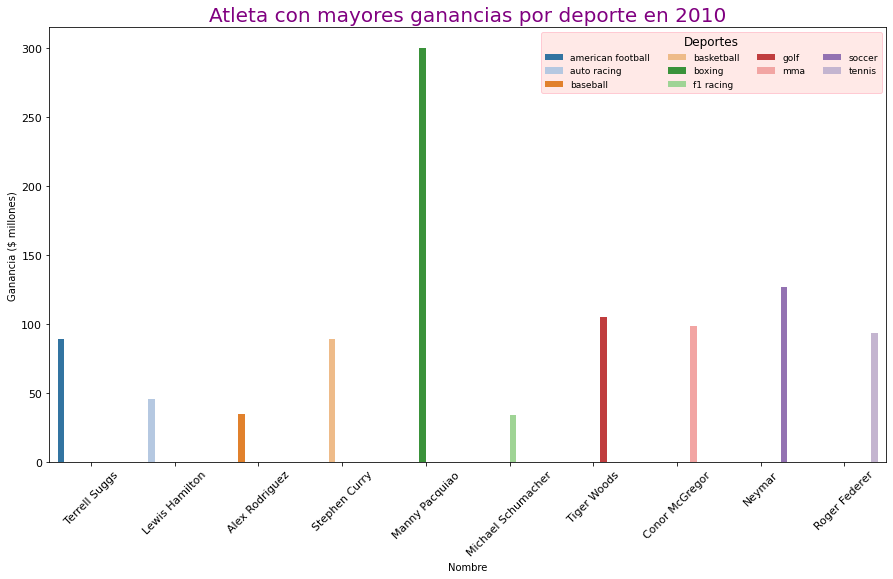

In [124]:
sns.barplot(x ="Nombre", y = "Ganancia ($ millones)", 
            hue="Deporte",data=maxga_2010, 
            ci=None, dodge=True, palette = "tab20"
            )
#Damos formato
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=11)

plt.title("Atleta con mayores ganancias por deporte en 2010",
          {"color":"Purple","fontsize":20}) 

plt.legend(fontsize=9, ncol=4,
           shadow=False, facecolor="mistyrose", edgecolor="pink",
           title="Deportes", title_fontsize=12,
           loc="upper right")
plt.gcf().set_size_inches(15, 8) #con ayuda de matplotlib.pyplot modifico el tamaño de mi grafico
plt.xticks(fontsize=11,rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

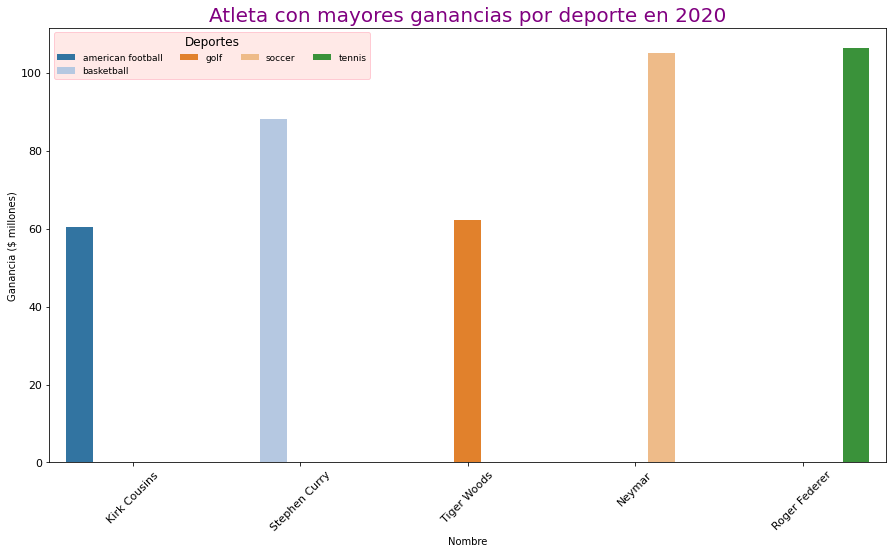

In [123]:
sns.barplot(x ="Nombre", y = "Ganancia ($ millones)", 
            hue="Deporte",data=maxga_2020, 
            ci=None, dodge=True, palette = "tab20"
            )

#Damos formato
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=11)

plt.title("Atleta con mayores ganancias por deporte en 2020",
          {"color":"Purple","fontsize":20}) 

plt.legend(fontsize=9, ncol=4,
           shadow=False, facecolor="mistyrose", edgecolor="pink",
           title="Deportes", title_fontsize=12,
           loc="upper left")

plt.gcf().set_size_inches(15, 8) #con ayuda de matplotlib.pyplot modifico el tamaño de mi grafico
plt.xticks(fontsize=11,rotation=45)


**Ganancia total por cada deporte por cada año**

In [ ]:
ganancia= df_limpio.pivot_table(index='Sport', columns="Year", values='earnings ($ million)', aggfunc='sum')
ganancia # creo un  nuevo df donde deporte y año no se repitan dentro del df, teniendo como valores la suma de la ganancia de los atletas

ganancia = ganancia.reset_index() #utilizo el metodo reset_index para generar un nuevo indice y que mi
ganancia                            #indice anterior se transforme en columna para poder trabajar con ella


In [69]:

id_vars = ["Sport"]  #columna que cumple con  tidy data
  #partimos de la variable enterior
df_m = pd.melt(ganancia, id_vars=["Sport"], value_name="Ganancia Total" , var_name="Año")  #transformamos fila de años en una columna
df_m   #nuevo data frame 

ganancia_tot=df_m.dropna() #eliminamos valores NaN  
ganancia_tot=ganancia_tot.rename(columns={"Sport":"Deporte"}) #renombramos columas
ganancia_tot.head()

#LISTO! :)

,Deporte,Año,Ganancia Total
2,auto racing,1990,19.0
5,basketball,1990,8.1
6,boxing,1990,75.7
10,golf,1990,25.2
22,auto racing,1991,33.0


In [122]:
#GRAFICA
fig = px.bar(ganancia_tot, x="Año", y="Ganancia Total", color="Deporte",
             title="Ganancia total por deporte y por año",text_auto=True)
fig.show()



**Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020**

In [84]:
#FILTRO para mostrar solo atletas del 2010 al 2020
años=df_limpio[df_limpio["Year"] >= 2010]  
años

#LIMPIEZA DE DATOS
años=años.sort_values(["Name","Year"]) #reordeno por nombre y año(de menos a mas)
años=años.drop(columns = ["earnings ($ million)", "Década","Sport"], axis=1) # eliminamos columnas que no vamos a ocupar
años
años['Previous Year Rank'] = años['Previous Year Rank'].replace(['?','??','>10','>20','>100','>14']
                                                                ,[0 ,0, 11 ,21,101,15]) #reemplazamos simbolos
años=años[años['Previous Year Rank'].notna()]  #eliminamos valores NaN de la columna
años['Previous Year Rank'] = años['Previous Year Rank'].astype(int) #hacemos que los datos sean tipo int
años

#GENERO el df
años = años[años["Previous Year Rank"] - años["Current Rank"] >=2]
años

deportistas=años.drop_duplicates(subset=["Name"]) #eliminamos las filas con nombres de atletas repetidos
deportistas

#Personalizamos df
deportistas=deportistas.rename(columns={"Name":"Nombre","Nationality":"País",
                                       "Current Rank":"Posición actual", "Year":"Año",
                                       "Previous Year Rank":"Posicion el año previo"})


deportistas.style.set_properties(**{'background-color': '	mistyrose',
                            'color': 'black',
                            'border-color': 'black'})



,Nombre,País,Posición actual,Posicion el año previo,Año
208,Alex Rodriguez,Dominican,8,12,2011
257,Cam Newton,USA,7,21,2016
284,Canelo Alvarez,Mexico,4,15,2019
300,Carson Wentz,USA,10,101,2020
274,Conor McGregor,Ireland,4,24,2018
207,Cristiano Ronaldo,Portugal,7,13,2011
199,Eli Manning,USA,9,11,2010
192,Floyd Mayweather,USA,2,11,2010
259,Jordan Spieth,USA,9,21,2016
247,Kevin Durant,USA,7,20,2015


In [ ]:
#ESTO NO nope 
apariciones=años['Name'].value_counts() #contamos cuantas veces aparece en el ranking un deportista
apariciones=apariciones.to_frame()       #si solo aparece una vez lo descartamos
apariciones=apariciones.drop(apariciones[apariciones ["Name"]==1].index) #eliminamos filas con valor 1
apariciones

In [86]:
#GRAFICA
fig = px.scatter(deportistas, x="Año", y="Posición actual",
	         size="Posicion el año previo", color="Nombre",
                 hover_name="País", log_x=True, size_max=60)
fig.show()


**Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados**

In [ ]:
# Atletas mejor pagados por año
mejor_pagados = df_limpio[df_limpio['Current Rank'] == 1].sort_values(by="Year",ascending=False)

mejor_pagados = mejor_pagados[["Year",'Name','Sport','Nationality','earnings ($ million)']]
mejor_pagados


In [ ]:
# Atletas no Rankeados

#Limpio datos
df_limpio['Previous Year Rank'] = df_limpio['Previous Year Rank'].replace(["not ranked","NaN",'?','??','>10','>20','>100','>14']
                                                                ,[0, 0, 0, 0, 11 ,21,101,15]) #reemplazamos simbolos
#obtenemos el df para los Atletas no rankeados
no_rankeados = df_limpio[df_limpio['Previous Year Rank'] == 0] #obtenemos el df para los Atletas no rankeados
no_rankeados
#cambio el nombre de mis columnas
no_rankeados=no_rankeados.rename(columns={"Name":"Nombre", "Nationality":"Pais","Sport":"Deporte","Year":"Año",
                                          "earnings ($ million)":"Ganancia ($ millones)"})
no_rankeados

In [ ]:
#uno mis df de atletas mejor pagados y atletas no rankeados
noran_bestgan= pd.concat([no_rankeados, mejor_pagados], axis=1) 
noran_bestgan

#obtengo un nuevo df en el que el nombre del deportista coincide en ambos df y listo!
df_final = noran_bestgan[noran_bestgan['Name'] == noran_bestgan['Nombre']] 
df_final

#elimino columnas inecesarias
df_final=df_final.drop(columns = ["earnings ($ million)","Sport","Name",
                                  "Nationality","Year","Current Rank","Previous Year Rank"], axis=1) 

#doy formato a mi df 
df_final["Año"]=df_final['Año'].astype(int)

df_final.style.set_properties(**{'background-color': 'mistyrose',
                            'color': 'black',
                            'border-color': 'black'})

,Nombre,Pais,Deporte,Año,Ganancia ($ millones)
211,Floyd Mayweather,USA,boxing,2012,85.000000


**Crea un tablero en Power BI que represente los aspectos más importantes del dataset, a tu gusto**